In [6]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
#Generate 3d dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [8]:
X[:5,:]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [9]:
#Visualize 3d
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


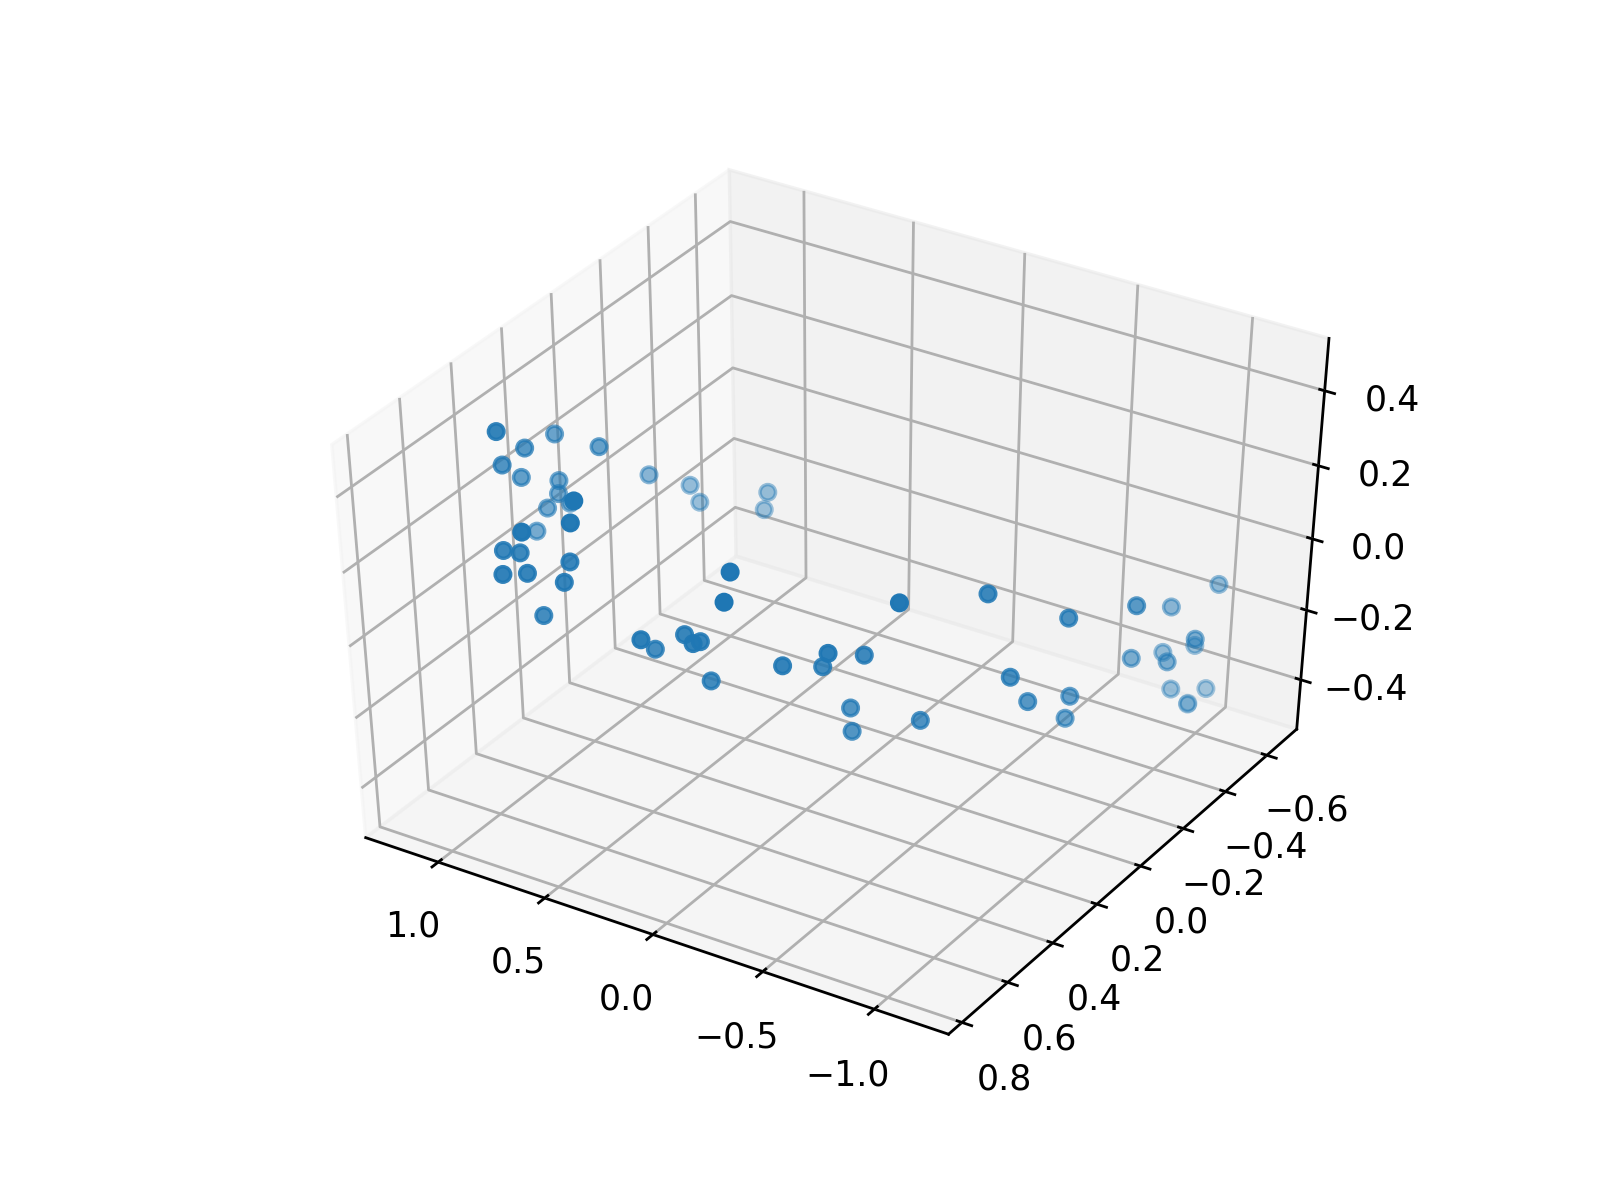

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], 'gray')
plt.show()

In [11]:
%matplotlib inline

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [13]:
X2D = pca.transform(X)

In [14]:
X2D.shape

(60, 2)

In [29]:
X2D[:5,:]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [30]:
X[:5,:]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [15]:
X.shape

(60, 3)

In [16]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

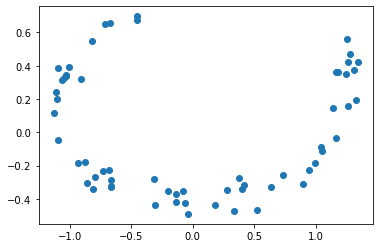

In [17]:
#Create Plot
#Reduced Dimensionality
plt.scatter(X2D[:,0],X2D[:,1]);

In [19]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [18]:
pca1 = PCA(n_components = 1)
pca1.fit_transform(X)
pca1.components_

array([[-0.93636116, -0.29854881, -0.18465208]])

In [20]:
pca.explained_variance_

array([0.77830975, 0.1351726 ])

In [21]:
np.sum(pca.explained_variance_)

0.9134823506732382

In [22]:
info_lost = 1 - np.sum(pca.explained_variance_)

In [23]:
info_lost

0.08651764932676176

In [24]:
X3D_Reconstruct = pca.inverse_transform(X2D)
# Reverse engineering

In [25]:
X3D_Reconstruct.shape

(60, 3)

In [26]:
Error = np.mean(np.sum(np.square(X3D_Reconstruct - X), axis=1))

In [27]:
Error

0.010170337792848549

In [32]:
X.shape

(60, 3)

In [33]:
#Centered towards mean
X_Centered = X - X.mean(axis=0)

In [34]:
U,S,Vt = np.linalg.svd(X_Centered)

In [37]:
Vt*(-1)

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ],
       [ 0.08626012,  0.31420255, -0.94542898]])

In [36]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])